<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<hr>

# MODIS Level 2 - MCD14DL - Fire Radiative Power

### About

This notebook provides you an introduction to data from the [Moderate Resolution Imaging Spectroradiometer (MODIS)](https://modis.gsfc.nasa.gov/about/). We are using MODIS fire radiative power data as a proxy for the next-generation [Fire Radiative Power Pixel (FRPPIXEL) product](https://landsaf.ipma.pt/en/products/fire-products/frppixel/) from LSA SAF that will integrate data from Meteosat Third Generation's [Flexible Combined Imager](https://www.eumetsat.int/mtg-flexible-combined-imager).

This notebook shows the structure of [MODIS Thermal Anomalies/Fire locations 1km FIRMS V0061 NRT (Vector data)](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/mcd14dl) and how to load, browse and visualize the data. 

The events featured in this notebook are the wildfires in Gironde, France in July 2022.

### Basic Facts

> **Spatial coverage**: `Global` <br>
> **Time step**: `Monthly` <br>
> **Data availability**: `since 2000`


### How to access the data

This notebook uses the MODIS MCD14DL dataset from the Terra and Aqua platforms. The MCD14DL dataset archive can be ordered via the [FIRMS](https://firms.modaps.eosdis.nasa.gov/download/) and are distributed in `shp`, `json` or `csv` format, which is then zipped. 

You need to [register for an Earthdata account](https://urs.earthdata.nasa.gov/) before being able to download data.

### Module outline:
- [1 - Load and browse MODIS MCD14DL Level 2 data](#modis_load)
- [2 - Visualise MODIS MCD14DL Level 2 data](#modis_vis)

<hr>

##### Load required libraries

In [1]:
import os
import numpy as np
import pandas as pd

# Python libraries for visualization
import matplotlib.colors
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

##### Load helper functions

In [2]:
%run ./functions.ipynb

<hr>

## <a id="modis_load"></a>1. Load and browse MODIS Fire Radiative Power data

[OPTIONAL] The first step is to unzip file from the zipped archive downloaded. This is optional as we have already unzipped the file for you. This is why the code is commented out.

The zipped archive contains data in a Comma-Separated Values or `csv` file and a Readme text document. The period requested was from 1 July 2022 to 31 August 2022.

In [4]:
# import zipfile
# with zipfile.ZipFile('../eodata/portugal_fire_workshop/modis/DL_FIRE_M-C61_301766.zip', 'r') as zip_ref:
#    zip_ref.extractall('../eodata/portugal_fire_workshop/modis/')

After we downloaded the station observations as a `csv` file, we can open it with the pandas function `read_table()`. We additonally set specific keyword arguments that allow us to specify the columns and rows of interest:
* `delimiter`: specify the delimiter in the text file, e.g. comma
* `header`: specify the index of the row that shall be set as header.
* `index_col`: specify the index of the column that shall be set as index

You see below that the resulting dataframe has 1973 rows and 13 columns.

In [22]:
df = pd.read_table('../eodata/portugal_fire_workshop/modis/fire_nrt_M-C61_301766.csv', delimiter=',', header=[0], index_col=5)
df

latitude  longitude  brightness  scan  track  acq_time satellite  \
acq_date                                                                       
2022-07-01  51.03433    2.28162      309.22  2.69   1.57      1336      Aqua   
2022-07-01  43.44584    4.90446      306.38  1.01   1.01      2123     Terra   
2022-07-02  43.44469    4.90400      306.88  1.34   1.15       132      Aqua   
2022-07-02  48.09588    1.85748      311.80  1.10   1.05      1100     Terra   
2022-07-02  48.08670    1.85396      314.49  1.10   1.05      1100     Terra   
...              ...        ...         ...   ...    ...       ...       ...   
2022-08-30  43.44769    4.90617      304.44  1.42   1.18      2146     Terra   
2022-08-31  43.45144    4.90111      309.29  1.08   1.04       141      Aqua   
2022-08-31  51.03085    2.27917      313.50  1.76   1.30      1119     Terra   
2022-08-31  51.03702    2.29187      315.25  1.00   1.00      1251      Aqua   
2022-08-31  51.02621    2.28107      325.84  1.00   1.00      1251      Aqua   

           instrument  confidence version  bright_t31    frp daynight  
acq_date                                                               
2022-07-01      MODIS          45  6.1NRT      295.01  18.71        D  
2022-07-01      MODIS          68  6.1NRT      292.39   6.95        N  
2022-07-02      MODIS          70  6.1NRT      290.41  13.15        N  
2022-07-02      MODIS          33  6.1NRT      299.68   5.71        D  
2022-07-02      MODIS          67  6.1NRT      302.57   8.59        D  
...               ...         ...     ...         ...    ...      ...  
2022-08-30      MODIS          60  6.1NRT      292.46   8.29        N  
2022-08-31      MODIS          77  6.1NRT      291.84   9.85        N  
2022-08-31      MODIS          59  6.1NRT      296.63  15.69        D  
2022-08-31      MODIS          39  6.1NRT      300.49   6.47        D  
2022-08-31      MODIS          79  6.1NRT      302.68  16.76        D  

[1973 rows x 13 columns]

From the dataframe above, let us only select the columns of interest for us. This makes the handling of the dataframe much easier. The columns of interest are: `acq_date`, `latitude`, `longitude`, `confidence` and `frp`. You can use the function `filter()` to select specific columns.

In [23]:
frp = df.filter(['acq_date','latitude','longitude','confidence','frp'])
frp

latitude  longitude  confidence    frp
acq_date                                          
2022-07-01  51.03433    2.28162          45  18.71
2022-07-01  43.44584    4.90446          68   6.95
2022-07-02  43.44469    4.90400          70  13.15
2022-07-02  48.09588    1.85748          33   5.71
2022-07-02  48.08670    1.85396          67   8.59
...              ...        ...         ...    ...
2022-08-30  43.44769    4.90617          60   8.29
2022-08-31  43.45144    4.90111          77   9.85
2022-08-31  51.03085    2.27917          59  15.69
2022-08-31  51.03702    2.29187          39   6.47
2022-08-31  51.02621    2.28107          79  16.76

[1973 rows x 4 columns]

Next, we filter the dataframe for rows which have an acquisition date or `acq_date` of `2021-07-18`. You will see that the number of rows is reduced to 223 rows.

In [34]:
frp_date = frp.filter(like='2022-07-18', axis=0)
frp_date

latitude  longitude  confidence     frp
acq_date                                           
2022-07-18  44.47277   -0.49860         100  258.57
2022-07-18  49.64505   -1.80693          22   35.32
2022-07-18  49.65572   -1.81061          45   41.50
2022-07-18  44.54525   -1.22504          99  103.07
2022-07-18  44.52955   -1.22618          87   68.77
...              ...        ...         ...     ...
2022-07-18  48.38027   -3.95537         100  222.57
2022-07-18  48.37858   -3.96986         100  253.64
2022-07-18  49.09109   -0.59362          96   26.01
2022-07-18  49.09286   -0.59952         100   31.76
2022-07-18  49.64825   -1.85647         100   45.82

[223 rows x 4 columns]

Next, we remove the rows which have a confidence level below 60 percent. 

In [35]:
frp_conf = frp_date[frp_date['confidence'] >= 60]
frp_conf

latitude  longitude  confidence     frp
acq_date                                           
2022-07-18  44.47277   -0.49860         100  258.57
2022-07-18  44.54525   -1.22504          99  103.07
2022-07-18  44.52955   -1.22618          87   68.77
2022-07-18  44.48662   -0.52839          97   91.98
2022-07-18  44.48497   -0.48944         100  194.33
...              ...        ...         ...     ...
2022-07-18  48.38027   -3.95537         100  222.57
2022-07-18  48.37858   -3.96986         100  253.64
2022-07-18  49.09109   -0.59362          96   26.01
2022-07-18  49.09286   -0.59952         100   31.76
2022-07-18  49.64825   -1.85647         100   45.82

[196 rows x 4 columns]

## <a id="modis_load"></a>2. Visualise MODIS MCD14DL Level 2 data

You can make use of the `ListedColorMap` function from the matplotlib library to define the colors for each fire radiative power (FRP) class.

In [36]:
frp_cm = ListedColormap([[0, 0, 255./255.],
                                 [176./255., 196./255., 222./255.],
                                 [255./255., 255./255., 0],
                                 [1., 140./255., 0],
                                 [178./255., 34./255., 34./255.],
                                 [1, 0, 0]])

You can define the levels for the respective FRP classes in a list stored in the variable `bounds`. You can also use the `.BoundaryNorm()` function from `matplotlib.colors` to define the norm that you will use for plotting later. 

In [37]:
bounds = [0, 30, 40, 60, 80, 120, 500]
norm = BoundaryNorm(bounds, frp_cm.N)

<br>

The last step is to visualize the `FRP` data with matplotlib's `scatter` function.

The plotting code can be divided in five main parts:
* **Initiate a matplotlib figure**: Initiate a matplotlib plot and define the size of the plot
* **Specify coastlines, borders and a grid**: specify additional features to be added to the plot
* **Plotting function**: plot the data with the plotting function `scatter`
* **Specify color bar**: specify the color bar properties
* **Set plot title**: specify title of the plot

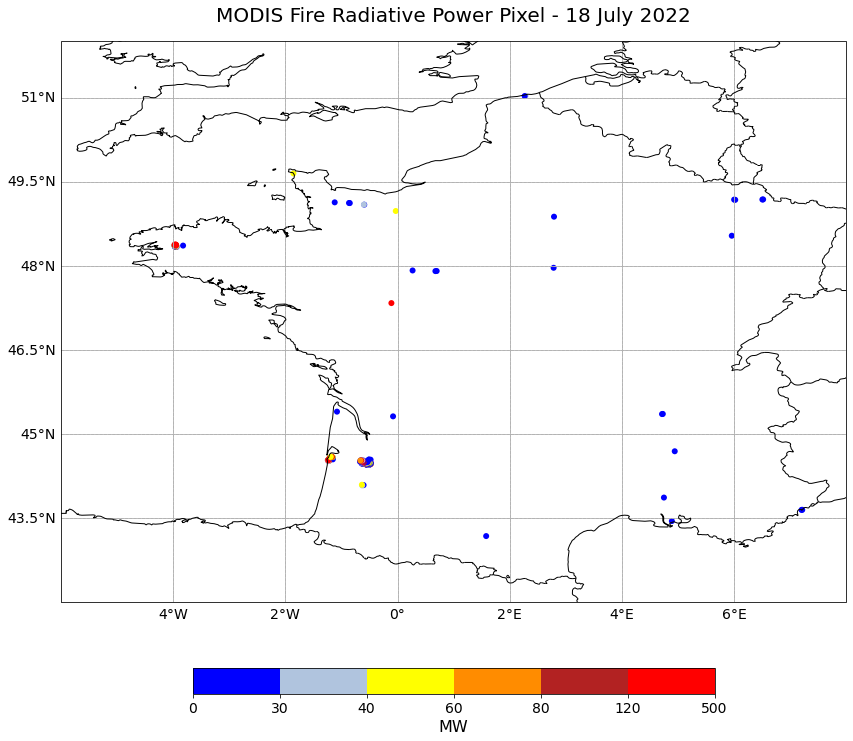

In [38]:
# Initiate a matplotlib figure
fig=plt.figure(figsize=(20, 12))
ax=plt.axes(projection=ccrs.PlateCarree())

# Specify coastlines and borders
ax.coastlines(zorder=3)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1, zorder=3)

# Specify a grid
gl = ax.gridlines()
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

# Set the plot extent to France
ax.set_extent([-6, 8, 42, 52], ccrs.PlateCarree())

# Plotting function
img1 = plt.scatter(frp_conf['longitude'],frp_conf['latitude'], c=frp_conf['frp'],
                   edgecolors='none',
                   cmap=frp_cm,
                   norm=norm,
                   zorder=2)


# Specify colorbar 
cbar = fig.colorbar(img1, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('MW',fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Set plot title
ax.set_title('MODIS Fire Radiative Power Pixel - 18 July 2022', fontsize=20, pad=20.0)

# Show plot
plt.show()

**Return to the case study:**
- [Monitoring fires with next-generation satellites from MTG and Metop-SG: Gironde, France Wildfires Case Study](./00_gironde_application_case.ipynb#gironde_fig2)

<hr>

### References
* MODIS Collection 61 Hotspot / Active Fire Detections MCD14ML distributed from NASA FIRMS. Available on-line https://earthdata.nasa.gov/firms. doi:10.5067/FIRMS/MODIS/MCD14ML

* Some code in this notebook was adapted from the following source:
    * origin: https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/90_workshops/202005_fire_workshop/62_case_study_sweden_fires_summer_2018_self_paced.ipynb
    * copyright: 2022, EUMETSAT
    * license: MIT
    * retrieved: 2022-06-28 by Sabrina Szeto

<hr>

<p style="text-align:right;">This project is licensed under the <a href="../LICENSE">GPL-3.0 License</a> and is developed under a Copernicus contract.